# Credit Card Fraud Detection
- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

1. 대회주제 개요
    - 현재 진행중인 Kaggle Competition
        - 오랫동안 진행된 대회 (5년)
    - 신용정보에서 사기탐지 (이진분류)
        - 사기: 1, 정상: 0

2. 대회주제 선택한 이유
    - 1번 포트폴리오(롯데백화점 신규고객 예측)에 대한 내용 확장
    - 유통 데이터는 아니지만 그나마 비슷한 특징을 가진 신용정보 데이터
        - Row 개수가 많고(284807), Target Class가 불균형함 (1: 0.17%, 0: 99.83%)

3. 전반적인 대회 문제 정의
    - Feature
        - Time, Amount를 제외한 모든 피쳐가 PCA로 변환된 값을 가짐 (변수 축소 및 보안유지 목적)
        - 모두 숫자형
    - Target
        - 사기: 1, 정상: 0
    - 원본 데이터는 creditcard.csv로 주어지고, Train과 Test는 직접 일정비율로 분리해서 만들어야 함

4. 문제 접근
    - Test셋 데이터: Target 비중이 동일한 Train, Test셋 미리 만들기
        - 나중에 머신러닝 모델로 원본 Test셋으로 예측해야됨
    - Sampling: Undersampling/Oversampling 을 통해 불균형한 Class를 균일화된 데이터로 변환하여 모델 학습
    - 성능지표: f1-score, precision/recall, confusion matrix 사용할 것 (불균형한 Class이므로)

5. 참고 코드
    - https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
- Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Baseline Code
- https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

### Set-Up

In [51]:
import sys
sys.path.append(r'C:\Users\KRX\Desktop\working\creditcard\.venv\Lib\site-packages')
# print(*sys.path, sep='\n')

In [52]:
import pandas as pd
import numpy as np
import warnings

pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('creditcard.csv')
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00000,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,...,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0
1,0.00000,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,...,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0
2,1.00000,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,...,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000,0
3,1.00000,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,...,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000,0
4,2.00000,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,...,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.00000,-11.88112,10.07178,-9.83478,-2.06666,-5.36447,-2.60684,-4.91822,7.30533,1.91443,...,0.21345,0.11186,1.01448,-0.50935,1.43681,0.25003,0.94365,0.82373,0.77000,0
284803,172787.00000,-0.73279,-0.05508,2.03503,-0.73859,0.86823,1.05842,0.02433,0.29487,0.58480,...,0.21421,0.92438,0.01246,-1.01623,-0.60662,-0.39526,0.06847,-0.05353,24.79000,0
284804,172788.00000,1.91957,-0.30125,-3.24964,-0.55783,2.63052,3.03126,-0.29683,0.70842,0.43245,...,0.23205,0.57823,-0.03750,0.64013,0.26575,-0.08737,0.00445,-0.02656,67.88000,0
284805,172788.00000,-0.24044,0.53048,0.70251,0.68980,-0.37796,0.62371,-0.68618,0.67915,0.39209,...,0.26524,0.80005,-0.16330,0.12321,-0.56916,0.54667,0.10882,0.10453,10.00000,0


In [54]:
print(df['Class'].value_counts())
print(492/284315*100)

Class
0    284315
1       492
Name: count, dtype: int64
0.17304750013189596


> Target과 Non-Target 비중이 Highly Imbalanced

### Scaling

> - Time, Amount 변수에 대한 Scaling 처리
> - Robust Scaler: rs = value-median / IQR; 중앙값과 사분위수 범위를 사용함으로 이상치에 덜 민감

In [55]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_time = df['scaled_time']
scaled_amount = df['scaled_amount']

df.drop(['scaled_time','scaled_amount'], axis=1, inplace=True)

df.insert(0, 'scaled_time', scaled_time)
df.insert(1, 'scaled_amount', scaled_amount)

display(df)

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.99498,1.78327,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,...,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,0
1,-0.99498,-0.26982,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,...,-0.06908,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,0
2,-0.99497,4.98372,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,...,0.52498,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,0
3,-0.99497,1.41829,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,...,-0.20804,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,0
4,-0.99496,0.67058,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,...,0.40854,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.03495,-0.29665,-11.88112,10.07178,-9.83478,-2.06666,-5.36447,-2.60684,-4.91822,7.30533,...,1.47583,0.21345,0.11186,1.01448,-0.50935,1.43681,0.25003,0.94365,0.82373,0
284803,1.03496,0.03899,-0.73279,-0.05508,2.03503,-0.73859,0.86823,1.05842,0.02433,0.29487,...,0.05962,0.21421,0.92438,0.01246,-1.01623,-0.60662,-0.39526,0.06847,-0.05353,0
284804,1.03497,0.64110,1.91957,-0.30125,-3.24964,-0.55783,2.63052,3.03126,-0.29683,0.70842,...,0.00140,0.23205,0.57823,-0.03750,0.64013,0.26575,-0.08737,0.00445,-0.02656,0
284805,1.03497,-0.16768,-0.24044,0.53048,0.70251,0.68980,-0.37796,0.62371,-0.68618,0.67915,...,0.12743,0.26524,0.80005,-0.16330,0.12321,-0.56916,0.54667,0.10882,0.10453,0


### Splitting the Data (original DataFrame)

> - Undersampling을 하기 전, 원본 데이터에 대한 Test셋을 생성 -> 학습된 모델을 테스트할 때 필요
> - Test셋을 생성할 때 Train과 동일하게 타겟 비중이 분포되도록 함 -> Stratified K-Fold Cross Validation(계층별 k-겹 교차 검증)
> - No Frauds 99.83 % of the dataset, Frauds 0.17 % of the dataset

In [56]:
from sklearn.model_selection import StratifiedKFold

# 데이터에서 X와 y분리
df_copy = df.copy()
y = df_copy['Class']
del df_copy['Class']
X = df_copy

In [57]:
print(X.shape, y.shape)

# 5 분할 하기
sss = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

for train_index, test_index in sss.split(X, y):
    # print(train_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

print(original_Xtrain.shape, original_Xtest.shape, original_ytrain.shape, original_ytest.shape)
print(original_ytrain.value_counts(normalize=True))
print(original_ytest.value_counts(normalize=True))

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

(284807, 30) (284807,)
(227846, 30) (56961, 30) (227846,) (56961,)
Class
0   0.99827
1   0.00173
Name: proportion, dtype: float64
Class
0   0.99828
1   0.00172
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### Random Under-Sampling

> Shuffle Data

In [58]:
df = df.sample(frac=1, random_state=99)
print(df.index.tolist()[:10])

[252556, 37912, 241557, 268242, 170271, 156668, 245815, 151326, 74133, 99541]


> Target Row 개수 기준으로 Non-Target Row 개수도 축소하기

In [59]:
print(df['Class'].value_counts())
target_cnt = np.sum(df['Class'])

fraud_df, non_fraud_df = df[df['Class']==1], df[df['Class']==0][:target_cnt]

new_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=99)
display(new_df)

Class
0    284315
1       492
Name: count, dtype: int64


,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
277334,0.97399,0.12436,1.99016,-0.28673,-1.15992,0.23083,0.25836,0.16949,-0.22967,0.01877,...,-0.07189,-0.01709,0.01361,0.14328,0.12607,-0.12669,0.20083,-0.04908,-0.05690,0
48094,-0.48400,0.04052,-1.27814,0.71624,-1.14328,0.21780,-1.29389,-1.16895,-2.56418,0.20453,...,0.81720,0.49018,0.47043,-0.12626,-0.12664,-0.66191,-0.34979,0.45485,0.13784,1
238222,0.76234,-0.29204,-4.28058,1.42110,-3.90823,2.94295,-0.07621,-2.00253,-2.87415,-0.85601,...,-0.19896,-0.14006,-0.90772,-0.68011,-0.34917,0.05628,-1.14992,-1.80989,0.72305,1
223618,0.69037,-0.29344,-2.00658,3.67658,-5.46381,7.23206,-1.62786,-0.99675,-4.29983,2.26887,...,0.47441,0.71391,-0.06387,0.16795,-0.44986,0.02370,0.53691,0.48586,-0.04239,1
57248,-0.43311,-0.20150,-0.88729,1.39000,1.21969,1.66143,1.00923,-0.73391,0.85583,0.00008,...,-0.26835,-0.08373,-0.34693,-0.05062,0.23104,-0.45076,-0.37621,0.03450,0.15778,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109117,-0.15825,0.02403,0.07055,0.60804,1.46158,0.88659,-0.25438,0.15777,0.08107,0.25115,...,-0.03496,0.22810,0.69394,0.30492,0.20572,-1.42036,-0.65038,0.26074,0.18529,0
140786,-0.00891,-0.29344,-0.43322,2.42838,-3.99645,4.87130,-1.79631,-0.58687,-4.65454,1.28523,...,0.74503,0.71356,-0.40895,-0.32089,-0.80423,0.96285,0.19956,1.09453,0.54115,1
8296,-0.86481,-0.29344,-2.12549,5.97356,-11.03473,9.00715,-1.68945,-2.85442,-7.81044,2.03087,...,1.49377,1.64652,-0.27848,-0.66484,-1.16456,1.70180,0.69081,2.11975,1.10893,1
40525,-0.52181,-0.29344,1.15937,2.84479,-4.05068,4.77770,2.94898,-2.01036,1.74409,-0.41029,...,-0.05926,-0.17654,-0.43347,-0.52932,-0.59702,1.33595,0.54709,0.00998,0.16077,1


### Target과 Feature 간 상관관계 분석

> Undersampling을 한 후 상관관계를 시각화해보면 패턴이 더 선명함

Text(0.5, 1.0, 'Undersampled Data Correlation')

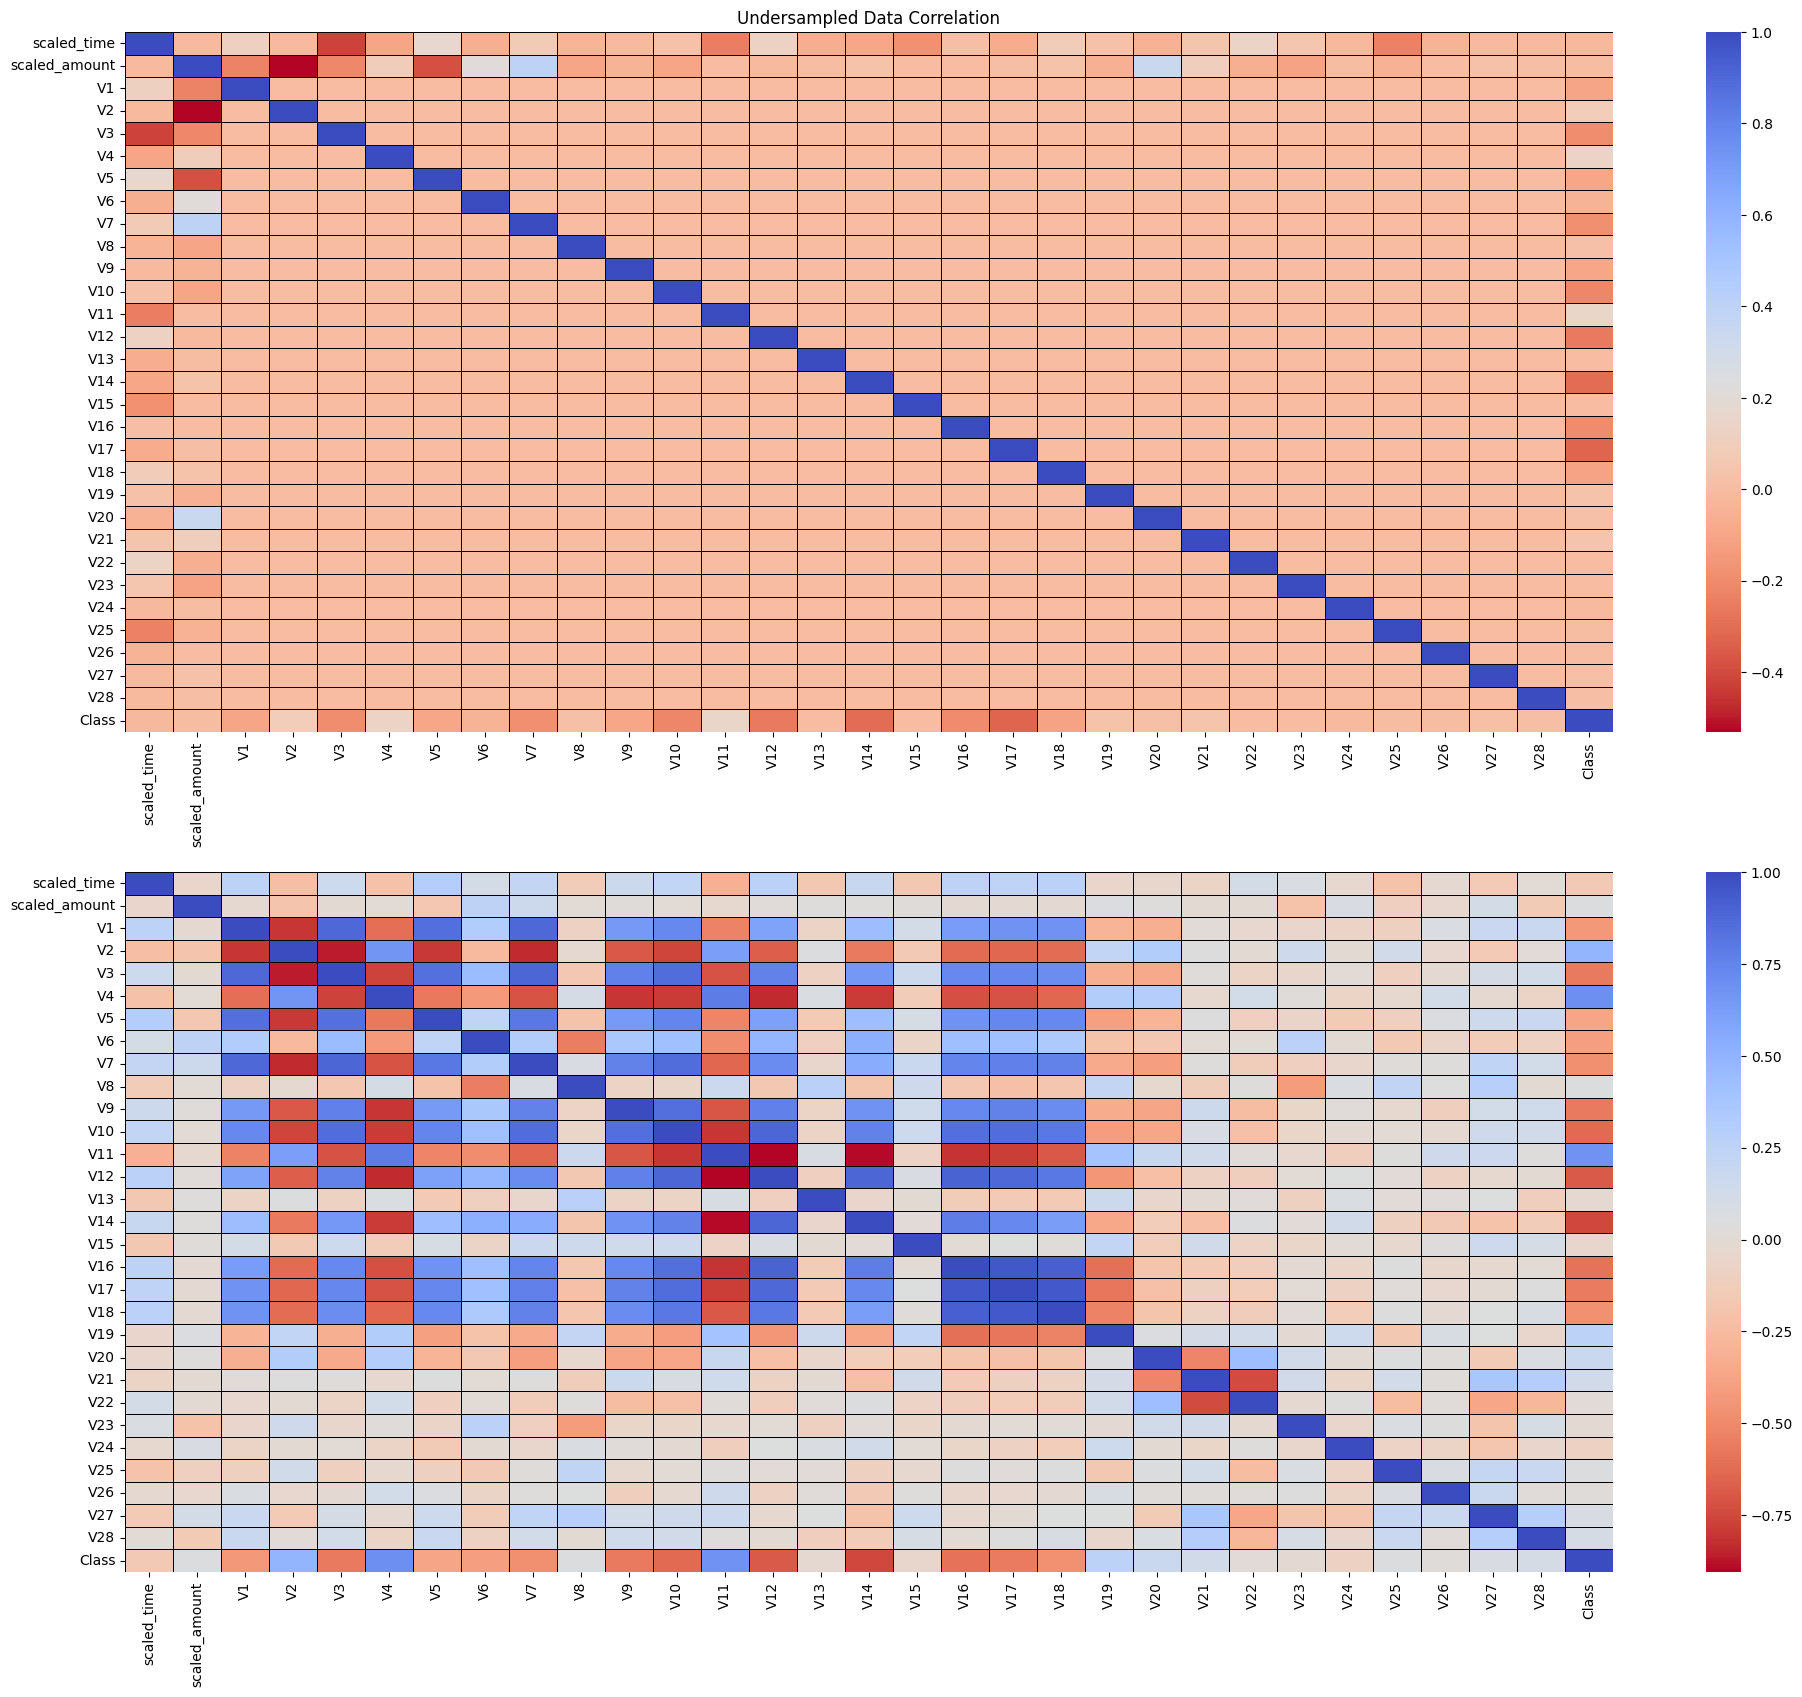

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(24, 20))

# 원본 데이터 Correlation 계산할 경우
sns.heatmap(df.corr(), cmap='coolwarm_r', annot_kws={'size':20}, linecolor='k', linewidths=0.5, ax=ax[0])
ax[0].set_title('Original Data Correlation')

# Undersampled 데이터 Correlation 계산할 경우
sns.heatmap(new_df.corr(), cmap='coolwarm_r', annot_kws={'size':20}, linecolor='k', linewidths=0.5, ax=ax[1])
ax[0].set_title('Undersampled Data Correlation')

<ul>
<li><b>Negative Correlations: </b>V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.  </li>
<li> <b> Negative Correlations: </b> V2, V4, V11, and V19 are Negatively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction. </li>
<li> <b>BoxPlots: </b>  We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions. </li>
</ul>

***
- Feature with Negative Correlation
    - Class와 강한 음의 상관관계가 있는 변수임 -> 이 변수값이 낮으면 Fraud 가능성도 높음
***

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

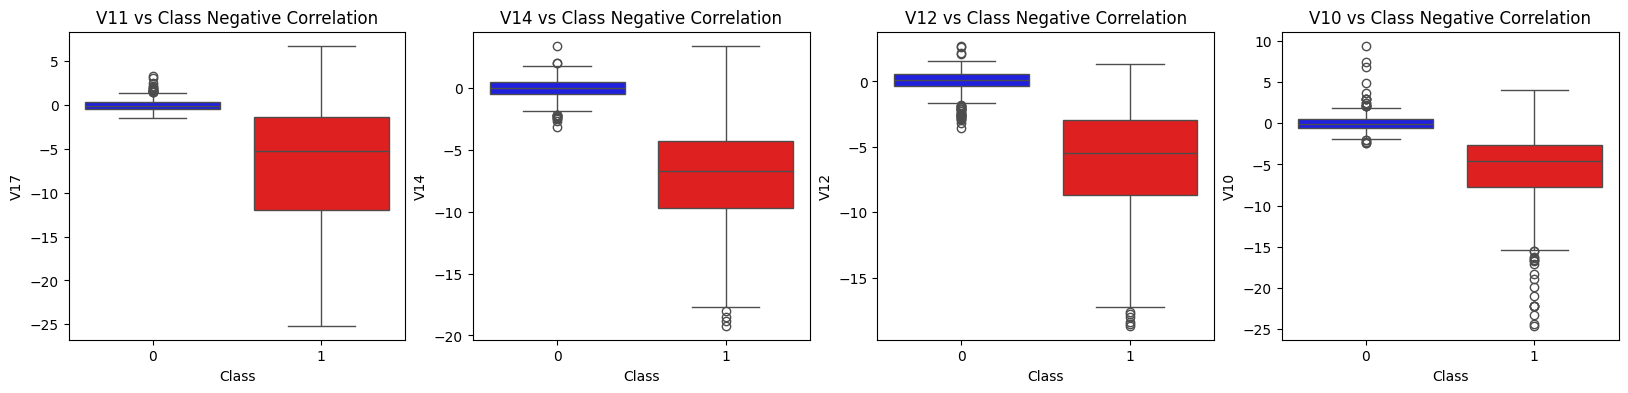

In [61]:
fig, ax = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x='Class', y='V17', data=new_df, palette=['b','r'], ax=ax[0])
ax[0].set_title('V11 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V14', data=new_df, palette=['b','r'], ax=ax[1])
ax[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V12', data=new_df, palette=['b','r'], ax=ax[2])
ax[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class', y='V10', data=new_df, palette=['b','r'], ax=ax[3])
ax[3].set_title('V10 vs Class Negative Correlation')

***
- 각 피쳐별 Class=1인 데이터에서 이상치 제거하기
    - V14, V12, V10에 이상치가 많이 보임
***

***
- Feature with Positive Correlation
    - Class와 강한 양의 상관관계가 있는 변수임 -> 이 변수값이 높으면 Fraud 가능성도 높음
***

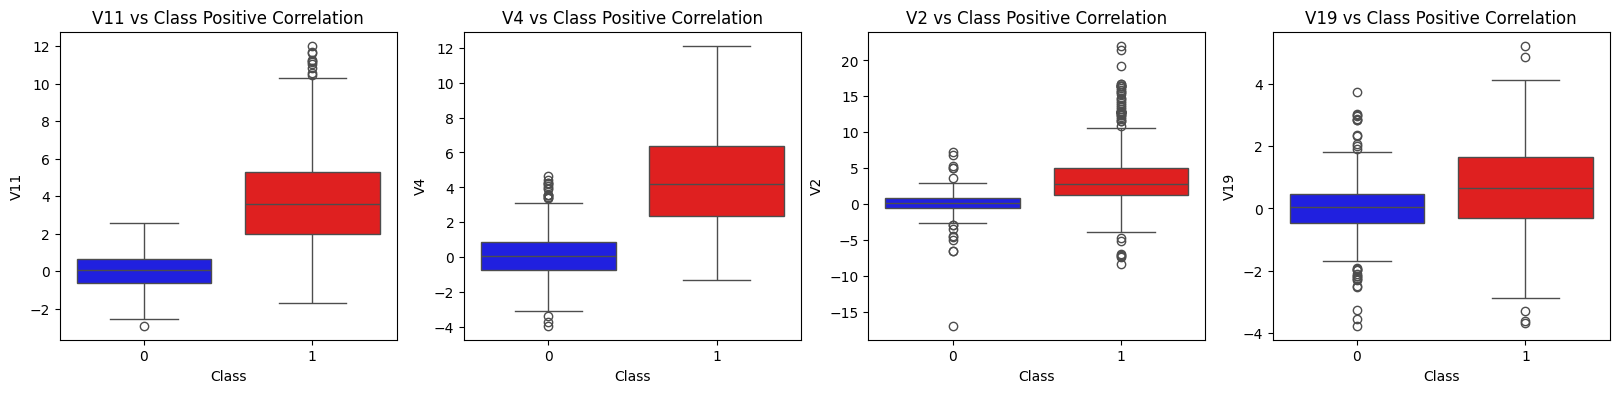

In [62]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=['b','r'], ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=['b','r'], ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=['b','r'], ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=['b','r'], ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

### Anomaly Detection
- Outlier 시각화 및 제거
    - IQ (Interquartile Range- 4분위수) 활용하여 이상치 제거
    - Lower Bound(Q1-1.5\*IQR) 보다 아래, Upper Bound(Q3+1.5\*IQR) 보다 위에 있는 값은 제거
        - IQR = Q3-Q1

<img src="./interquartile.jpg" alt="My Image">
    <small> - https://docs.oracle.com/cloud/help/ko/pbcs_common/PFUSU/insights_metrics_IQR.htm#PFUSU-GUID-CF37CAEA-730B-4346-801E-64612719FF6B</small>

Text(0.5, 1.0, 'V10 Distribution \n (Fraud Transactions)')

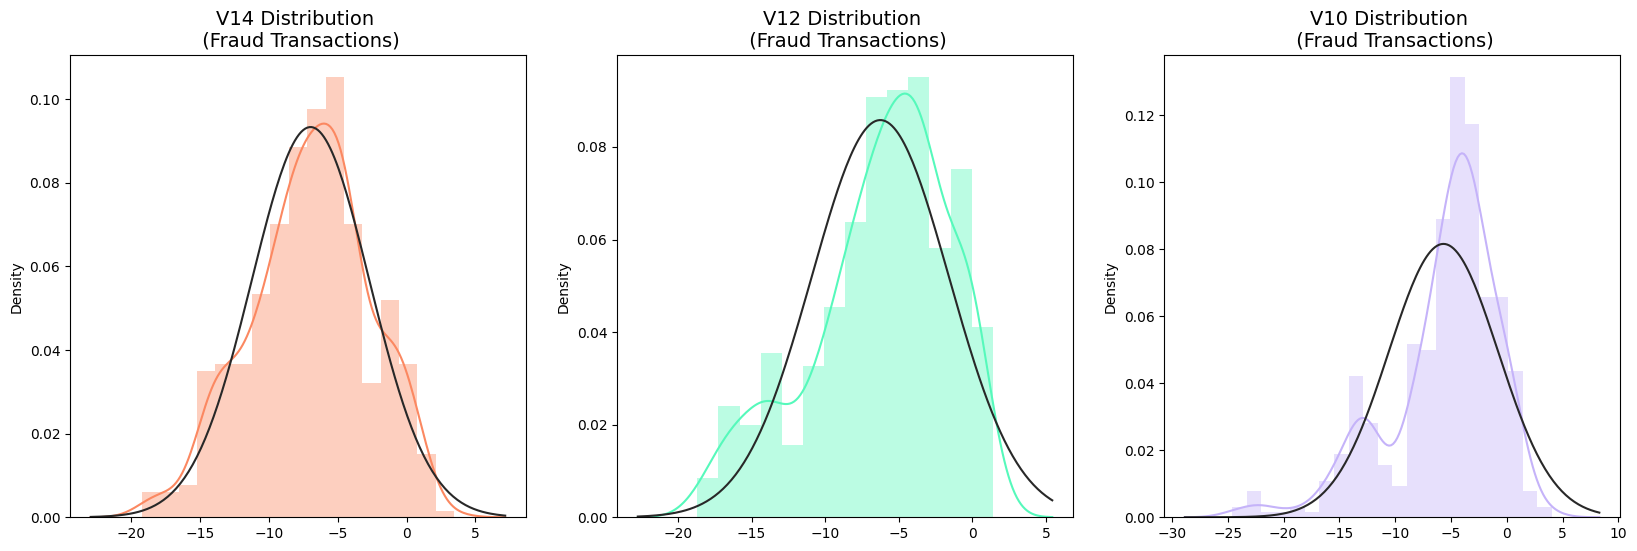

In [63]:
# 14, 12, 10
from scipy.stats import norm

fig, ax = plt.subplots(1,3, figsize=(20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=ax[0], fit=norm, color='#FB8861')
ax[0].set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist, ax=ax[1], fit=norm, color='#56F9BB')
ax[1].set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist, ax=ax[2], fit=norm, color='#C5B3F9')
ax[2].set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

In [64]:
rowno0 = new_df.shape[0]

# V14 Removing Outliers
print('V14')
v14_fraud = new_df.loc[new_df['Class']==1, 'V14'].values
q1 = np.percentile(v14_fraud, 25)
q3 = np.percentile(v14_fraud, 75)
iqr = q3-q1

lbound = q1-(1.5*iqr)
ubound = q3+(1.5*iqr)
print(lbound, ubound)

# lbound보다 작고, ubound보다 큰 값 제거
new_df = new_df.drop(new_df[(new_df['V14'] > ubound) | (new_df['V14'] < lbound)].index)
print('-'*80)

# V12 Removing Outliers
print('V12')
v12_fraud = new_df.loc[new_df['Class']==1, 'V12'].values
q1 = np.percentile(v12_fraud, 25)
q3 = np.percentile(v12_fraud, 75)
iqr = q3-q1
lbound = q1-(1.5*iqr)
ubound = q3+(1.5*iqr)
print(lbound, ubound)

# lbound보다 작고, ubound보다 큰 값 제거
new_df = new_df.drop(new_df[(new_df['V12'] > ubound) | (new_df['V12'] < lbound)].index)
print('-'*80)

# V10 Removing Outliers
print('V10')
v10_fraud = new_df.loc[new_df['Class']==1, 'V10'].values
q1 = np.percentile(v10_fraud, 25)
q3 = np.percentile(v10_fraud, 75)
iqr = q3-q1

lbound = q1-(1.5*iqr)
ubound = q3+(1.5*iqr)
print(lbound, ubound)

# lbound보다 작고, ubound보다 큰 값 제거
new_df = new_df.drop(new_df[(new_df['V10'] > ubound) | (new_df['V10'] < lbound)].index)

print(rowno0 - new_df.shape[0], '행이 제거됐습니다')

V14
-17.807576138200666 3.8320323237414167
--------------------------------------------------------------------------------
V12
-17.3430371579634 5.776973384895937
--------------------------------------------------------------------------------
V10
-14.89885463232024 4.92033495834214
38 행이 제거됐습니다


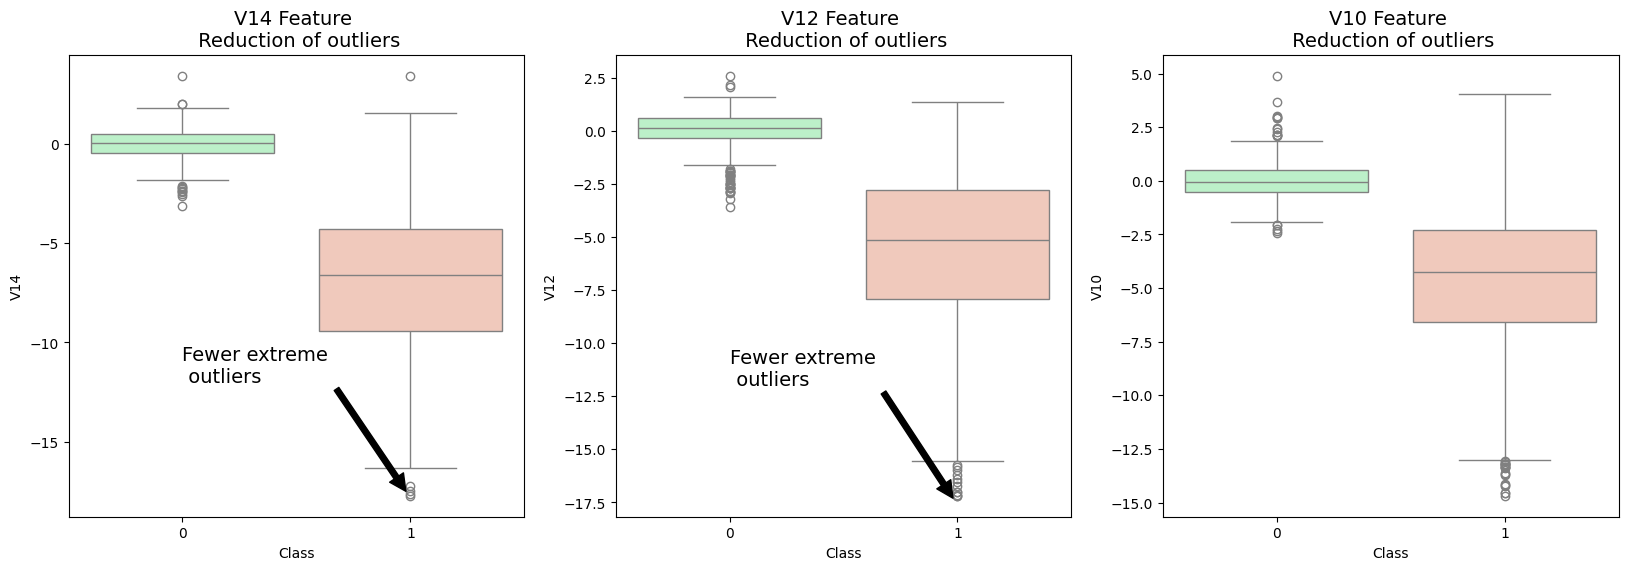

In [65]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

### Dimensionality Reduction and Clustering
- T-SNE, PCA, TruncatedSVD

***
우선 이 부분은 스킵
***

### Classifiers (UnderSampling)
- Logistic, Random Forest 등
- 분류결과 시각화

In [66]:
# Feature와 Target 분리
y = new_df.pop('Class')
X = new_df

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(756, 30) (190, 30) (756,) (190,)


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clfs = {
    'LogisticRegression': LogisticRegression(random_state=99),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=99),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SupportVectorClassifier': SVC(random_state=99),
}

In [69]:
from sklearn.model_selection import cross_val_score

for key, clf in clfs.items():
    score = cross_val_score(estimator=clf, X=X_train, y=y_train, scoring='recall', cv=5, verbose=0)
    print(clf, '성능 점수 :', score)

LogisticRegression(random_state=99) 성능 점수 : [0.92       0.90540541 0.87837838 0.95945946 0.86486486]
DecisionTreeClassifier(random_state=99) 성능 점수 : [0.89333333 0.86486486 0.86486486 0.94594595 0.87837838]
KNeighborsClassifier() 성능 점수 : [0.90666667 0.85135135 0.90540541 0.95945946 0.85135135]
SVC(random_state=99) 성능 점수 : [0.88       0.85135135 0.87837838 0.91891892 0.83783784]


In [70]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [71]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.05%
Knears Neighbors Cross Validation Score 93.39%
Support Vector Classifier Cross Validation Score 93.52%
DecisionTree Classifier Cross Validation Score 92.59%


In [72]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 100, 1: 100})


In [73]:
# Make Syntetic Imbalanced Data
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 100, 1: 100})


### Oversampling도 시도
- SMOTE 방식
- original dataset -> cross-validation -> oversampling
    - Data Leakage 방지를 위해 cross-validation 이후에 oversampling 해야함

In [74]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve

log_reg_params = {
    'penalty': ['l1','l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}

log_reg_sm = LogisticRegression(random_state=99)
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

result_list = []
# Cross Validation -> Over Sampling -> Model Tuning
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    y_pred = best_est.predict(original_Xtrain[test])

    result_list.append({
        'auroc': roc_auc_score(original_ytrain[test], y_pred),
        'accuracy': accuracy_score(original_ytrain[test], y_pred),
        'precision': precision_score(original_ytrain[test], y_pred),
        'recall': recall_score(original_ytrain[test], y_pred),
        'f1-score': f1_score(original_ytrain[test], y_pred),
    })

result_df = pd.DataFrame(result_list)
display(result_df)


'''
오버샘플링 잘됐는지 확인
for train, test in sss.split(original_Xtrain, original_ytrain):
    smote = SMOTE(sampling_strategy='minority')
    oversampled_X, oversampled_y  = smote.fit_resample(original_Xtrain[train], original_ytrain[train])
    print(Counter(oversampled_y))'''


,auroc,accuracy,precision,recall,f1-score
0,0.89424,0.78885,0.00814,1.00000,0.01616
1,0.94885,0.97454,0.05873,0.92308,0.11043
2,0.92273,0.98449,0.08901,0.86076,0.16133
3,0.93816,0.97744,0.06508,0.89873,0.12137
4,0.93471,0.98317,0.08454,0.88608,0.15436


"\n오버샘플링 잘됐는지 확인\nfor train, test in sss.split(original_Xtrain, original_ytrain):\n    smote = SMOTE(sampling_strategy='minority')\n    oversampled_X, oversampled_y  = smote.fit_resample(original_Xtrain[train], original_ytrain[train])\n    print(Counter(oversampled_y))"

In [75]:
from sklearn.metrics import classification_report

# Prediction
labels = ['No Fraud','Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.85      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [76]:
y_score = best_est.decision_function(original_Xtest)

In [77]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

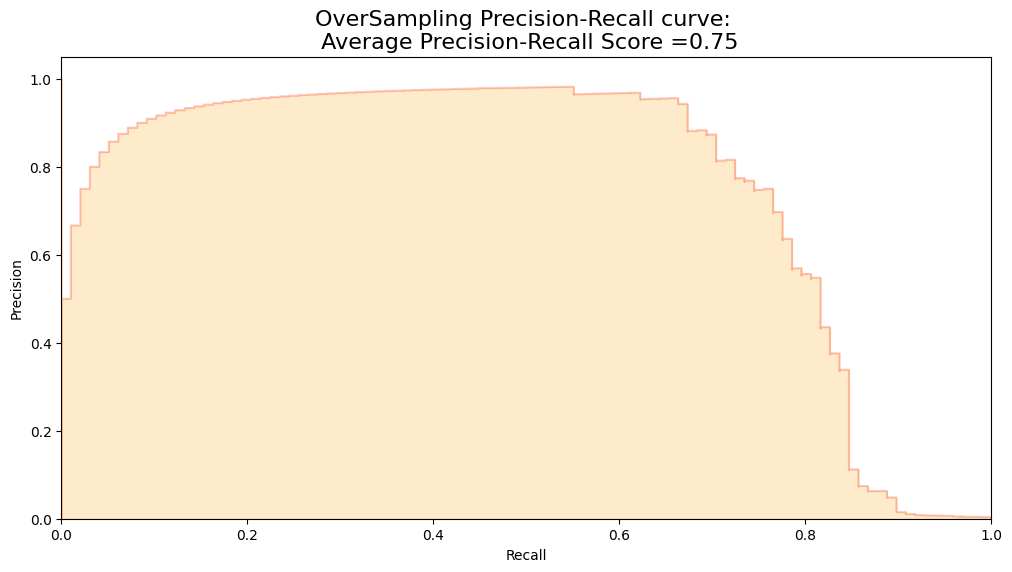

In [78]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

### Reference

Undersampling VS Oversampling
- https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets